Imports Necessary libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

Loads and processes Data

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

print("First 5 rows of dataset:")
print(data.head())
X = data[['Hours']].values
y = data['Scores'].values

First 5 rows of dataset:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Train Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

Polynomial Regression

In [5]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)


Performance Matrix

In [10]:
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (deg=2)"],
    "R² Score": [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_poly)],
    "MAE": [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_poly)]
})

print("Performance Comparison:")
print(metrics)

Performance Comparison:
                           Model  R² Score       MAE
0              Linear Regression  0.967806  3.920751
1  Polynomial Regression (deg=2)  0.964197  4.191113


Plotting

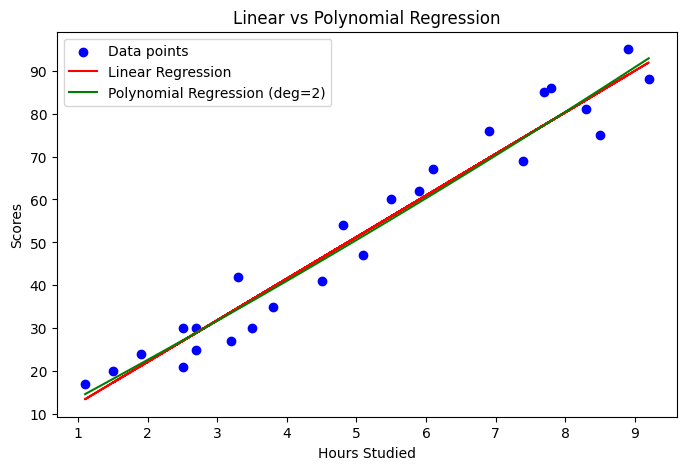

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data points')


plt.plot(X, lin_reg.predict(X), color='red', label='Linear Regression')


X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)
plt.plot(X_grid, poly_reg.predict(poly.transform(X_grid)),
         color='green', label='Polynomial Regression (deg=2)')

plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()